# Import packages and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
TRAIN_SET = '../data/Hotel-A-train.csv'
VAL_SET = '../data/Hotel-A-validation.csv'
TEST_SET = '../data/Hotel-A-test.csv'

In [22]:
df = pd.read_csv(TRAIN_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout', 'Booking_date'])
df_val = pd.read_csv(VAL_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout', 'Booking_date'])
df_test = pd.read_csv(TEST_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout', 'Booking_date'])

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


<AxesSubplot:>

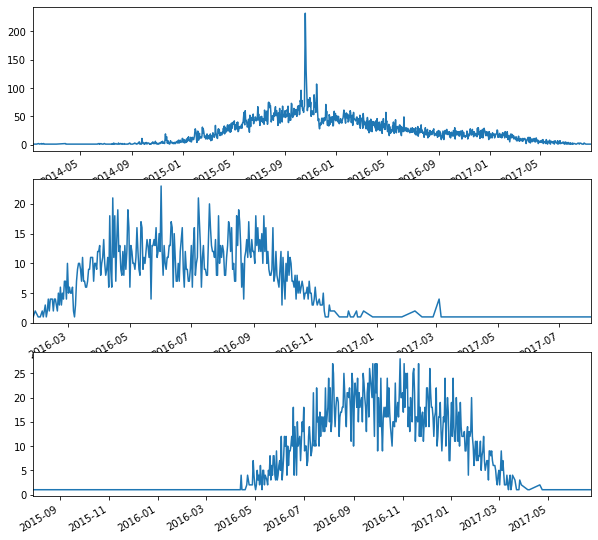

In [45]:
fig, axs = plt.subplots(3, figsize=(10,10))
df.Booking_date.value_counts().sort_index().plot.line(ax=axs[0])
df_val.Booking_date.value_counts().sort_index().plot.line(ax=axs[1])
df_test.Booking_date.value_counts().sort_index().plot.line(ax=axs[2])

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


<AxesSubplot:>

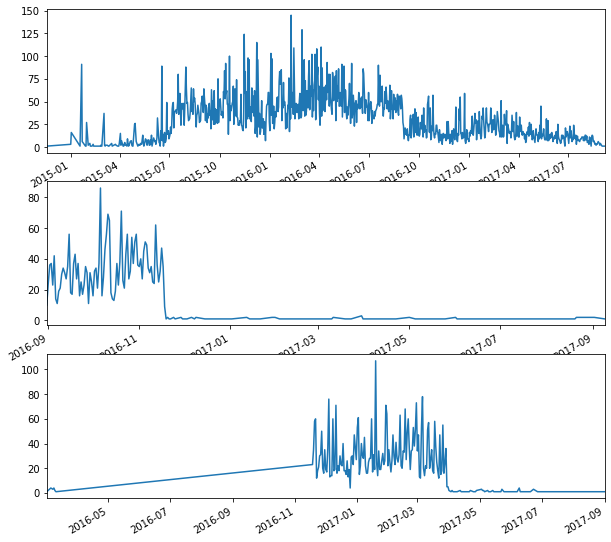

In [46]:
fig, axs = plt.subplots(3, figsize=(10,10))
df.Expected_checkin.value_counts().sort_index().plot.line(ax=axs[0])
df_val.Expected_checkin.value_counts().sort_index().plot.line(ax=axs[1])
df_test.Expected_checkin.value_counts().sort_index().plot.line(ax=axs[2])

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


<AxesSubplot:>

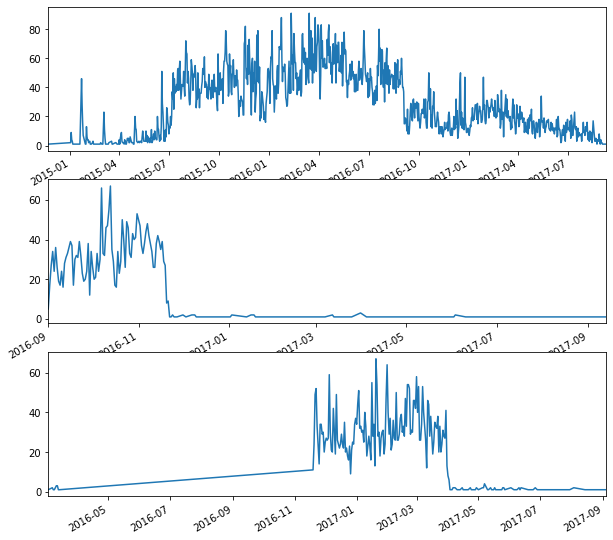

In [47]:
fig, axs = plt.subplots(3, figsize=(10,10))
df.Expected_checkout.value_counts().sort_index().plot.line(ax=axs[0])
df_val.Expected_checkout.value_counts().sort_index().plot.line(ax=axs[1])
df_test.Expected_checkout.value_counts().sort_index().plot.line(ax=axs[2])

In [25]:
df_val.Booking_date.min()

Timestamp('2016-01-26 00:00:00')

In [26]:
df_val.Booking_date.max()

Timestamp('2017-08-02 00:00:00')

In [27]:
df_test.Booking_date.max()

Timestamp('2017-06-24 00:00:00')

In [28]:
df_test.Booking_date.min()

Timestamp('2015-07-30 00:00:00')

In [32]:
print(df.Expected_checkout.min(), df.Expected_checkout.max())
print(df_val.Expected_checkout.min(), df_val.Expected_checkout.max())
print(df_test.Expected_checkout.min(), df_test.Expected_checkout.max())

2014-11-22 00:00:00 2017-09-09 00:00:00
2016-09-01 00:00:00 2017-09-13 00:00:00
2016-03-03 00:00:00 2017-09-04 00:00:00


In [33]:
print(df.Booking_date.min(), df.Booking_date.max())
print(df_val.Booking_date.min(), df_val.Booking_date.max())
print(df_test.Booking_date.min(), df_test.Booking_date.max())

2014-01-09 00:00:00 2017-08-30 00:00:00
2016-01-26 00:00:00 2017-08-02 00:00:00
2015-07-30 00:00:00 2017-06-24 00:00:00


In [16]:
df_val.Booking_date.value_counts()

6/1/2016      23
4/14/2016     21
7/8/2016      21
7/19/2016     20
8/17/2016     19
              ..
1/3/2017       1
5/14/2017      1
1/15/2017      1
12/9/2016      1
12/28/2016     1
Name: Booking_date, Length: 322, dtype: int64

In [11]:
df_test.Booking_date.min()

'1/1/2017'

In [5]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

# Dataset Statistics

In [145]:
df.index.value_counts()

91130744    2
76641511    2
95504255    2
55371044    2
14692111    1
           ..
52434071    1
20278424    1
77227399    1
52382876    1
84871169    1
Name: Reservation-id, Length: 27495, dtype: int64

In [143]:
df.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
Reservation-id,,,,,,,,,,,,,,,,,,,,
39428300,1,40,1,1,1,1,1,2,2,0,1,1,1,1,1,1,1,1,10,218
77491756,1,49,1,2,2,2,1,3,3,0,1,1,1,2,1,1,1,2,0,185
73747291,1,42,2,1,1,2,1,3,3,0,1,1,1,1,1,1,1,2,0,119
67301739,2,25,3,3,3,3,2,4,3,0,1,1,1,2,2,1,1,1,5,144
77222321,1,62,1,4,4,2,3,1,1,0,1,1,1,1,3,2,1,1,10,242


In [5]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [6]:
df.dtypes

Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                            object
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date                      object
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                          int64
dtype: object

In [7]:
df.shape

(27499, 23)

In [8]:
df.index.nunique()

27495

<AxesSubplot:>

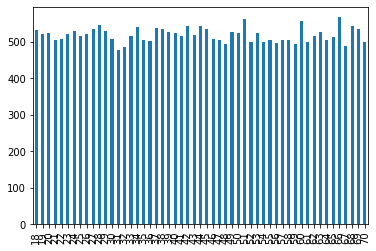

In [9]:
df.Age.value_counts().sort_index().plot.bar()

# Gender

Text(0.5, 1.0, 'District vs Base Pack')

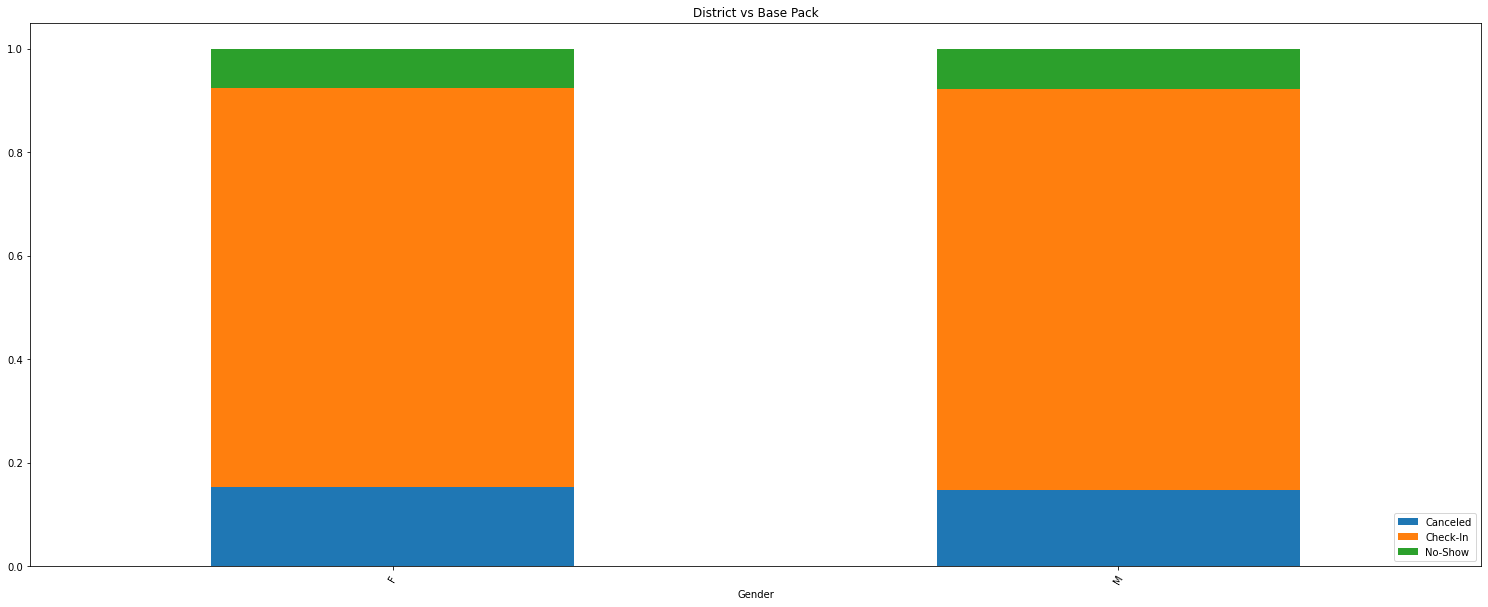

In [6]:
df_gender = df.groupby('Gender').Reservation_Status.value_counts().unstack().sort_index()
df_gender.divide(df_gender.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(26,10), rot=60)
plt.legend(loc='lower right')
plt.title("District vs Base Pack")

In [53]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [69]:
cat_cols = ['Previous_Cancellations',
     'Country_region',
     'Required_Car_Parking',
     'Deposit_type',
     'Ethnicity',
     'Income',
     'Gender',
     'Visted_Previously',
     'Educational_Level',
     'Booking_channel',
     'Hotel_Type',
     'Use_Promotion',
     'Meal_Type']

In [82]:
num_cols = df_num.columns.to_list()

In [84]:
df_num = df[num_cols + ['Reservation_Status']]

In [91]:
df.Discount_Rate.value_counts()

0     6829
10    5469
20    4162
5     4159
25    2721
15    1443
40    1373
30    1343
Name: Discount_Rate, dtype: int64

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


array([[<AxesSubplot:title={'center':'Adults'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Babies'}>,
        <AxesSubplot:title={'center':'Children'}>],
       [<AxesSubplot:title={'center':'Discount_Rate'}>,
        <AxesSubplot:title={'center':'Room_Rate'}>]], dtype=object)

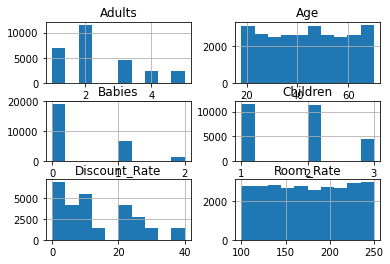

In [90]:
df_num.hist()

In [92]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

<AxesSubplot:xlabel='Meal_Type', ylabel='Room_Rate'>

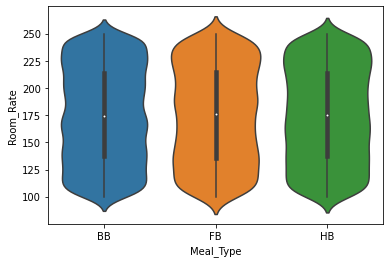

In [96]:
sns.violinplot(x='Meal_Type', y='Room_Rate', data=df)

<AxesSubplot:title={'center':'Room_Rate'}, xlabel='Meal_Type'>

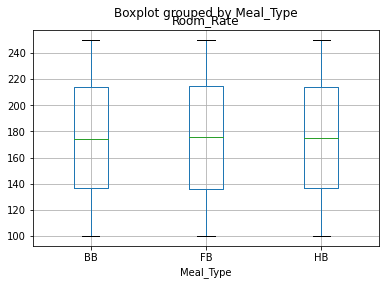

In [93]:
df.boxplot(column='Room_Rate', by='Meal_Type')

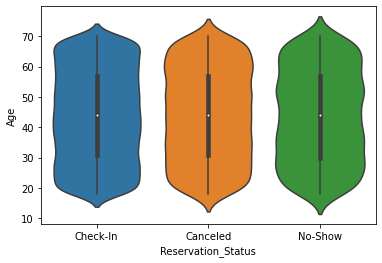

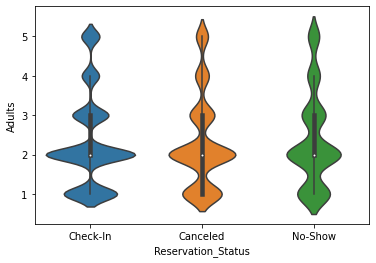

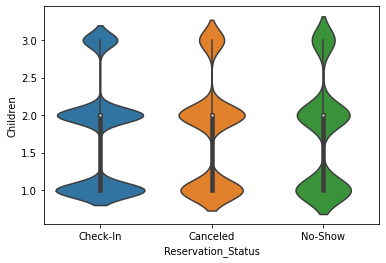

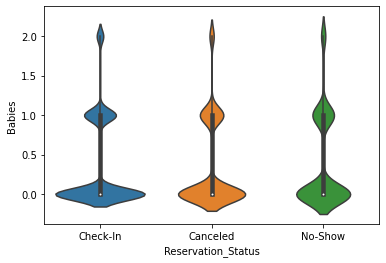

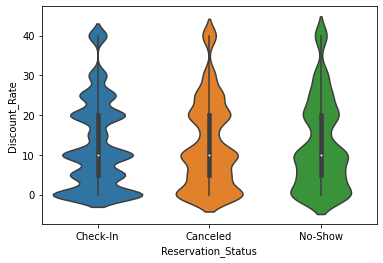

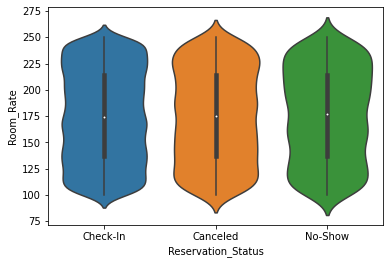

In [89]:
for col in num_cols:
    plt.figure()
    sns.violinplot(x='Reservation_Status', y=col, data=df_num)

<AxesSubplot:title={'center':'Age'}, xlabel='Reservation_Status'>

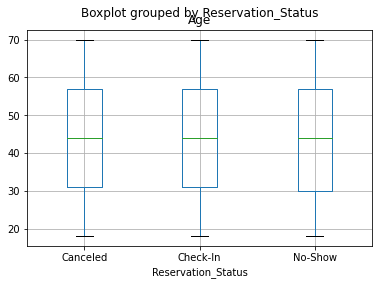

In [86]:
df_num.boxplot(column='Age', by='Reservation_Status')

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

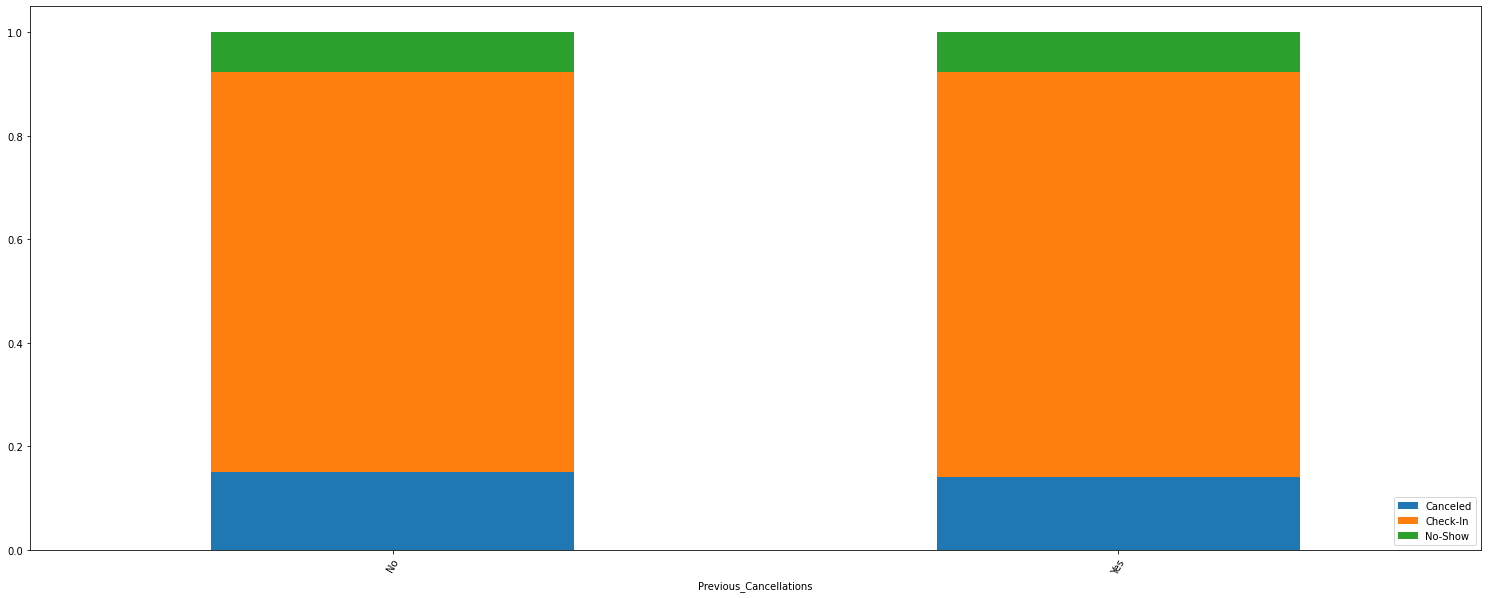

<Figure size 432x288 with 0 Axes>

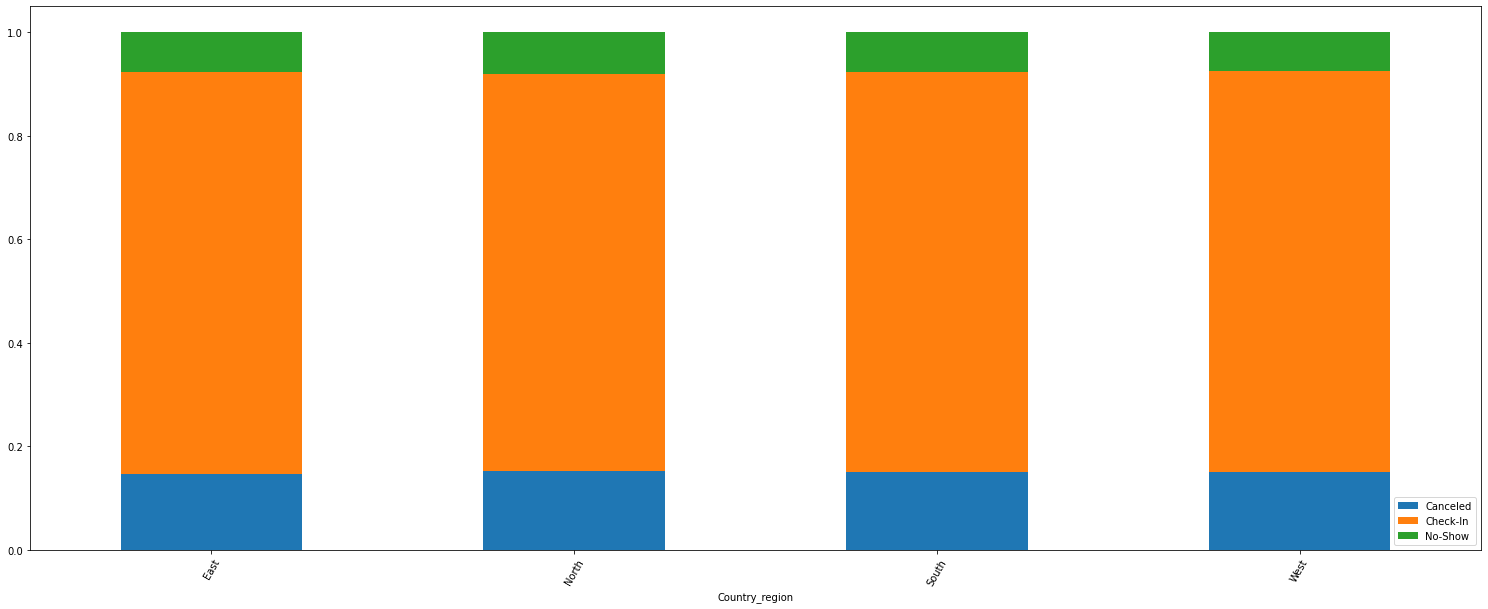

<Figure size 432x288 with 0 Axes>

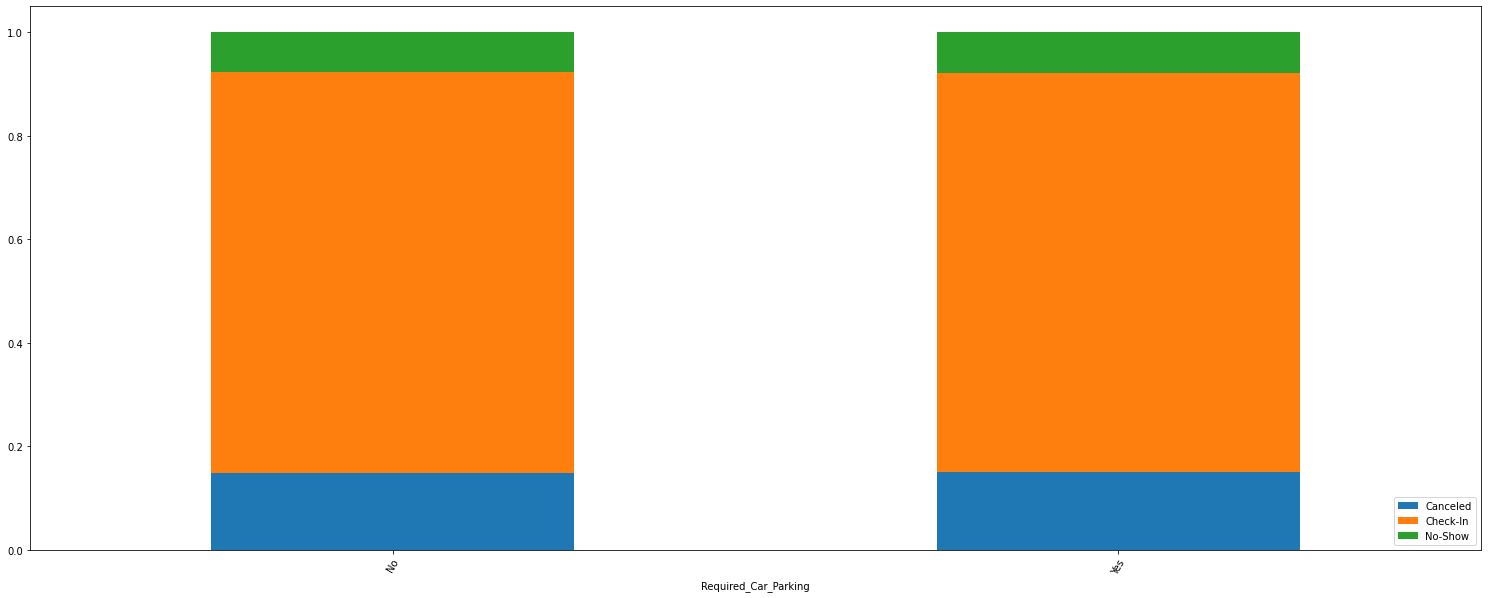

<Figure size 432x288 with 0 Axes>

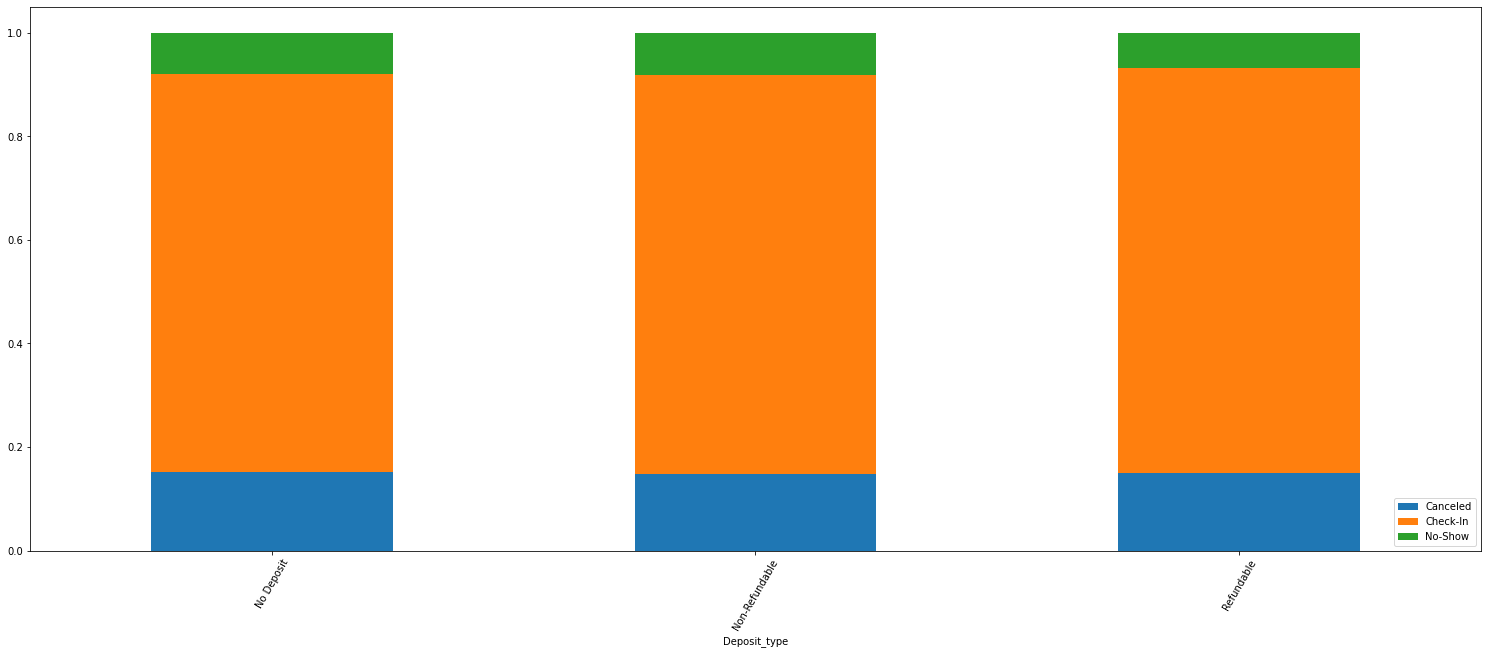

<Figure size 432x288 with 0 Axes>

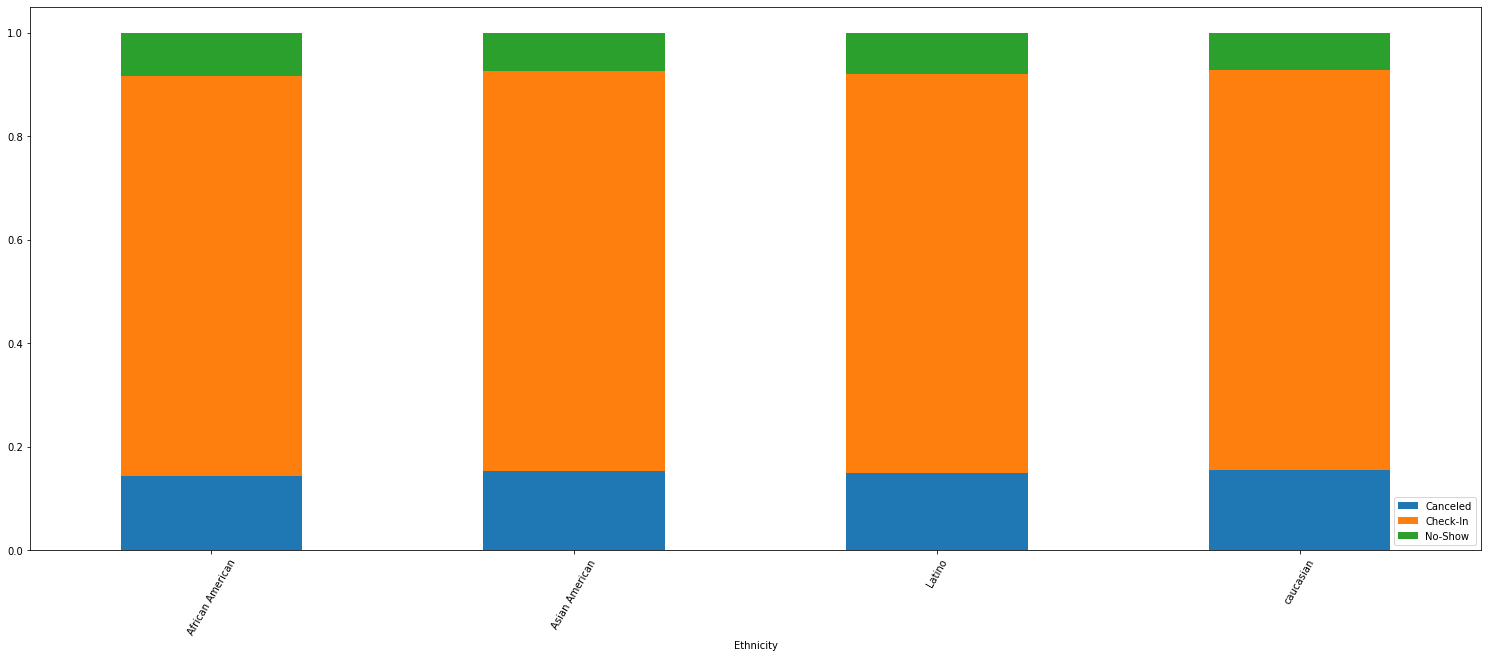

<Figure size 432x288 with 0 Axes>

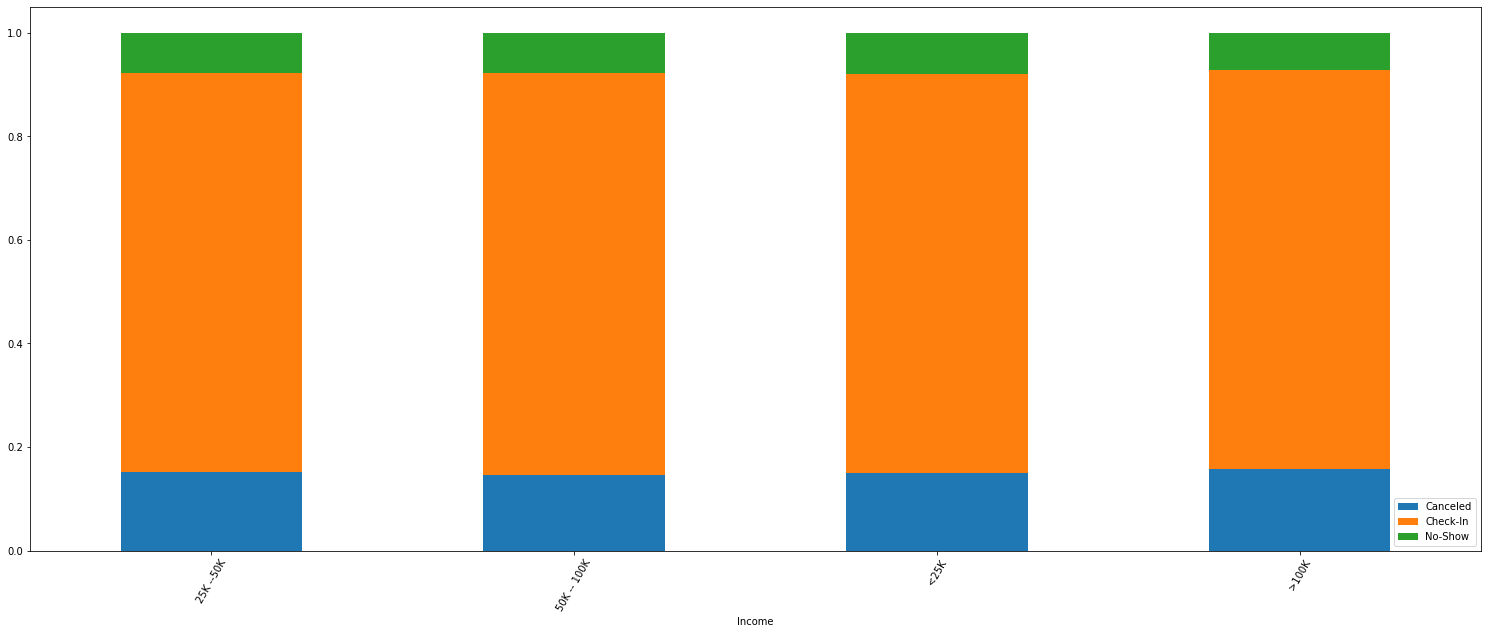

<Figure size 432x288 with 0 Axes>

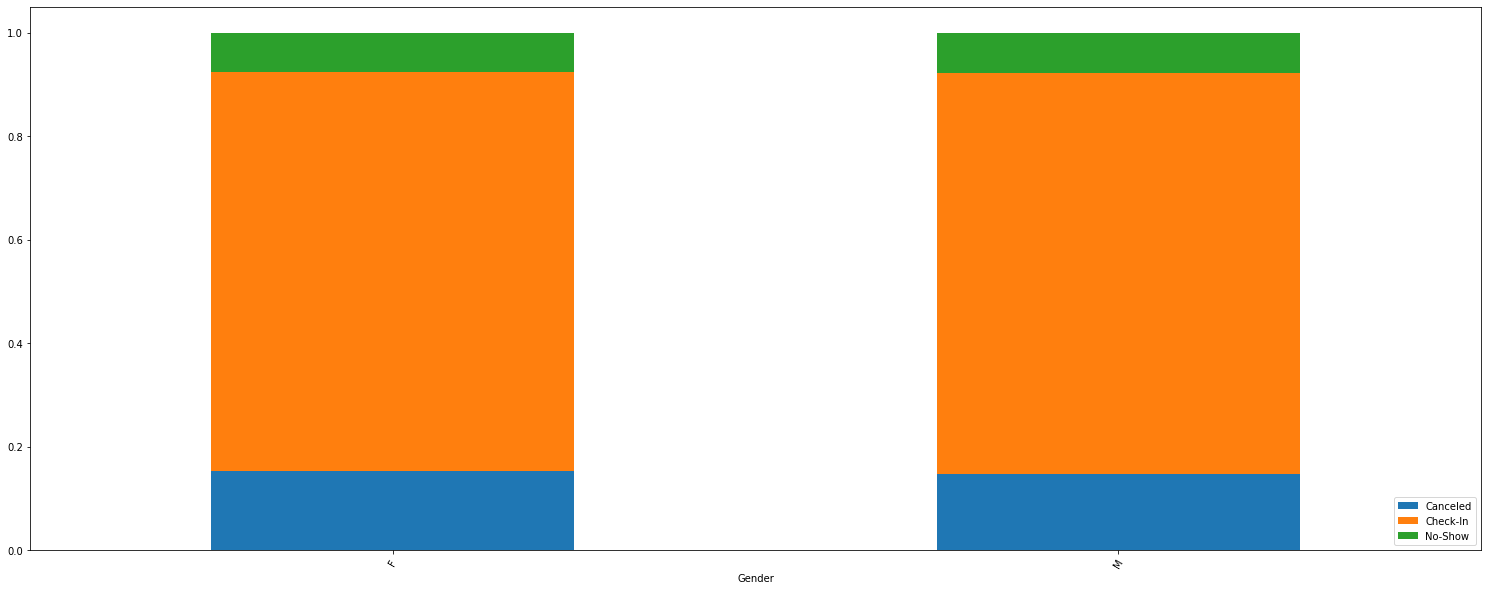

<Figure size 432x288 with 0 Axes>

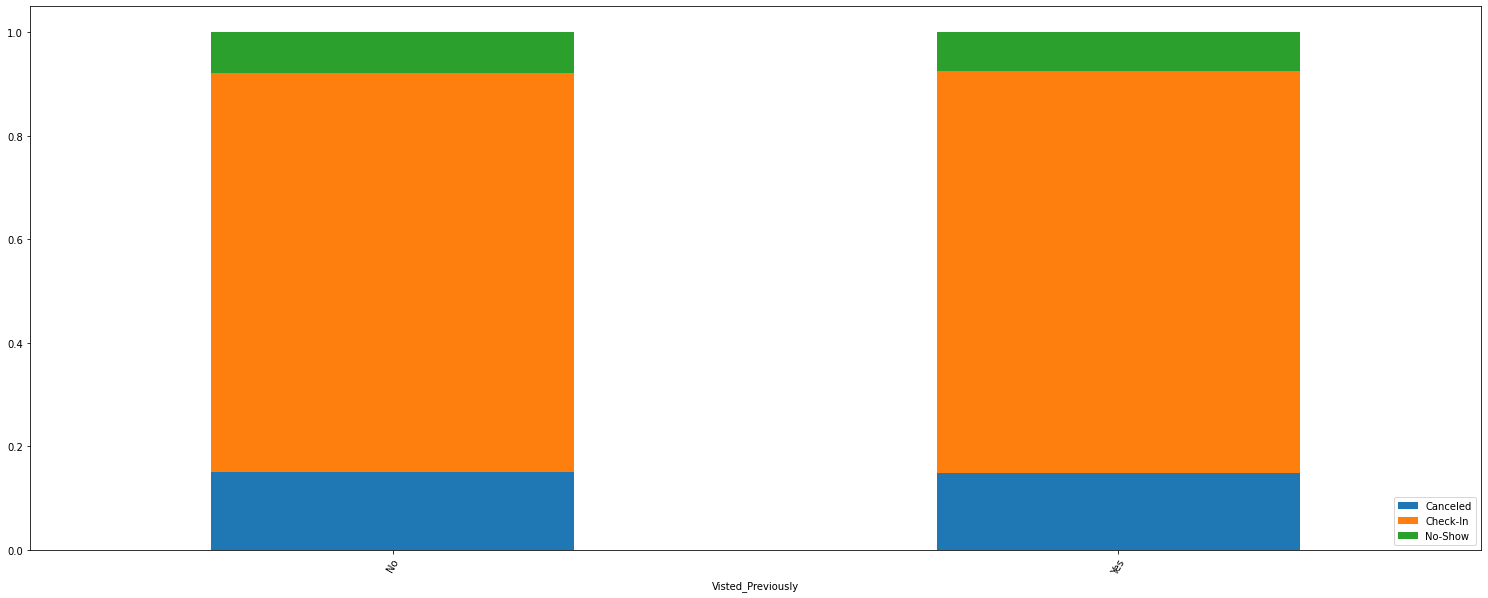

<Figure size 432x288 with 0 Axes>

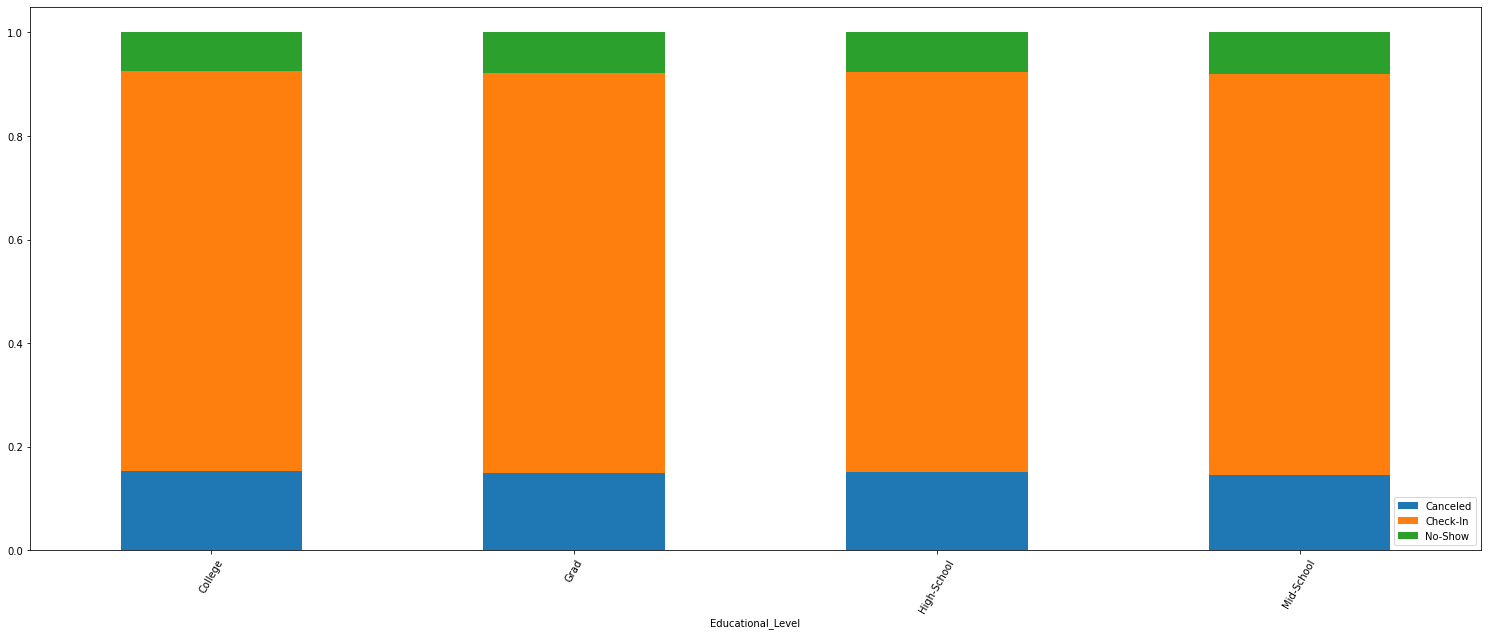

<Figure size 432x288 with 0 Axes>

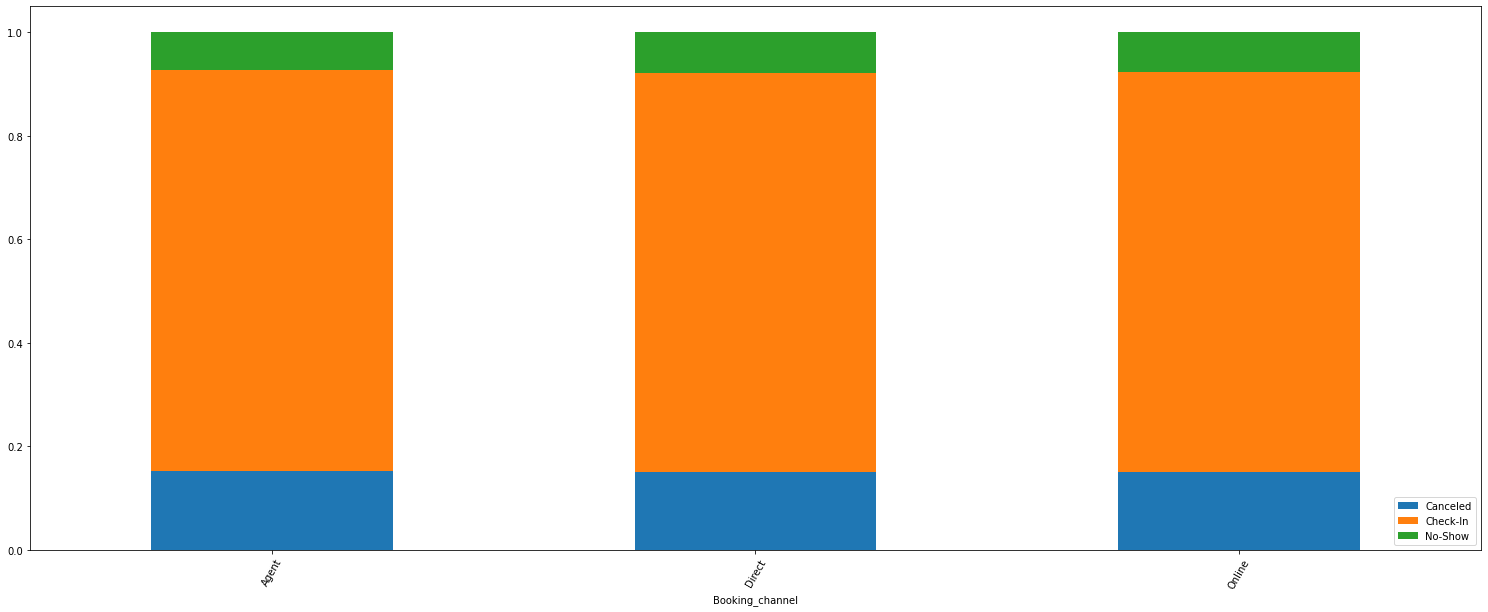

<Figure size 432x288 with 0 Axes>

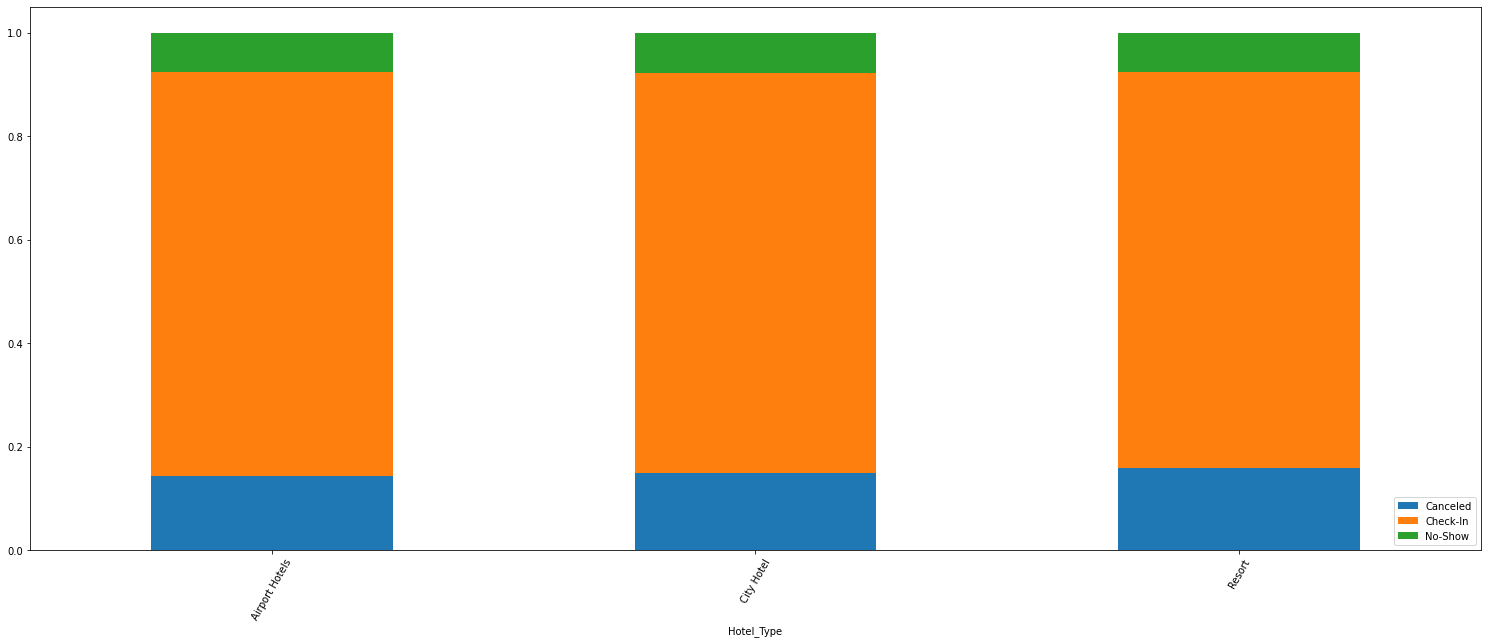

<Figure size 432x288 with 0 Axes>

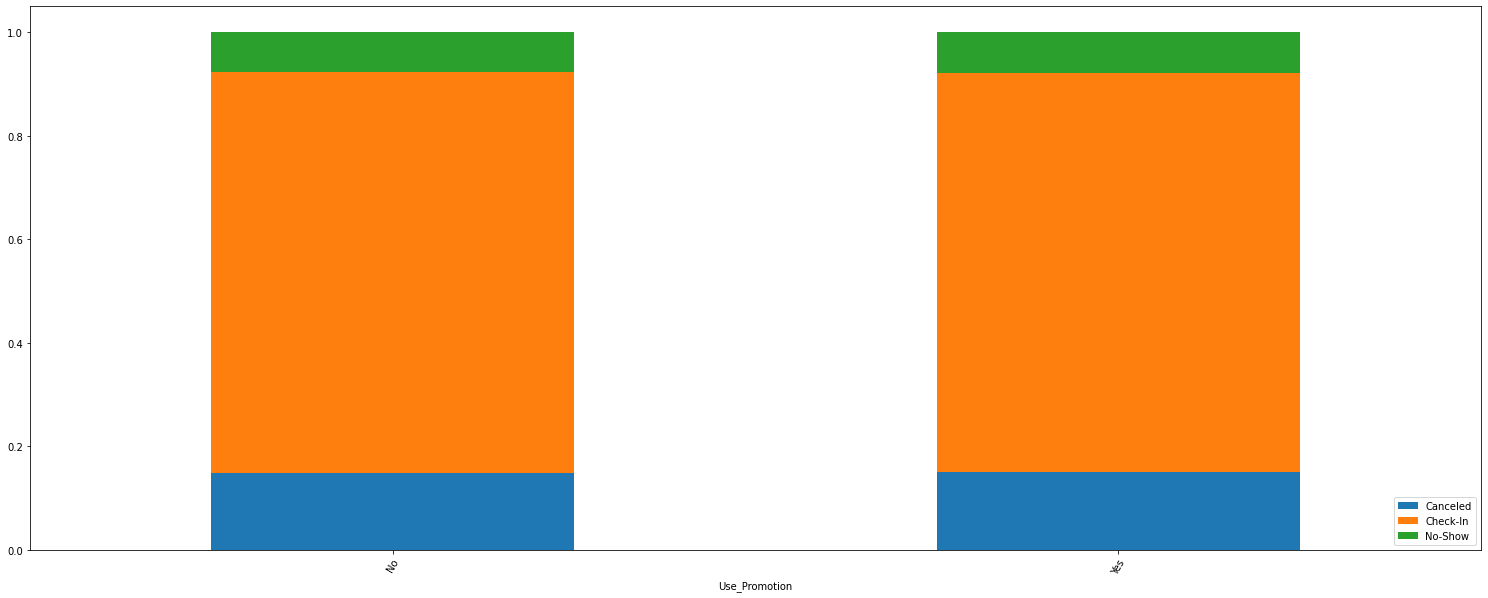

<Figure size 432x288 with 0 Axes>

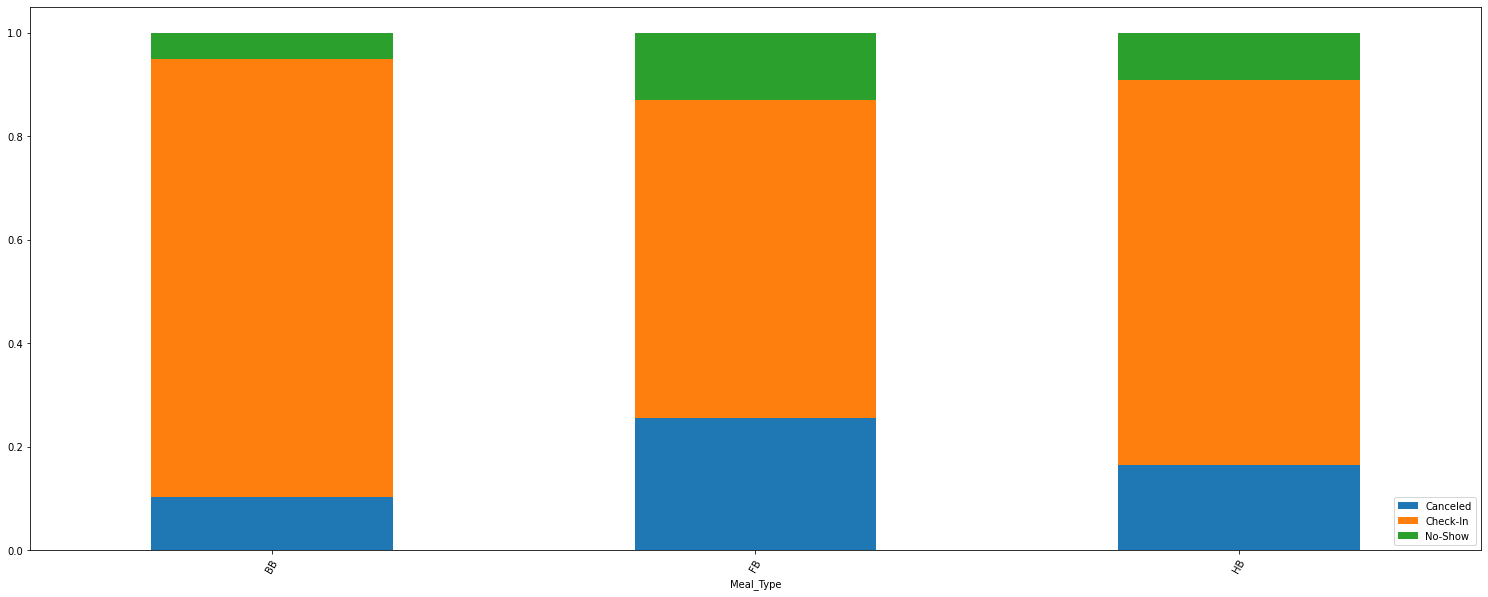

In [72]:
for col in cat_cols:
    plt.figure()
    df_cat = df.groupby(col).Reservation_Status.value_counts().unstack().sort_index()
    df_cat.divide(df_cat.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(26,10), rot=60)
    plt.legend(loc='lower right')